In [1]:
! pip install seaborn
! pip install statsmodels
! pip install scikit-learn
! pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 5.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 4.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 4.9 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.6 MB 5.1 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/12.6 MB 5.0 MB/s eta 0:00:02
   ------------- -----

# Import Data Set

In [3]:
import pandas as pd
data = pd.read_csv("mat_csv\\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [5]:
df = data[['daily','sunday']]

# Correlation

In [6]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


C:\Users\drxmu\AppData\Local\Temp\ipykernel_15708\2929324081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'])


<Axes: xlabel='daily', ylabel='Density'>

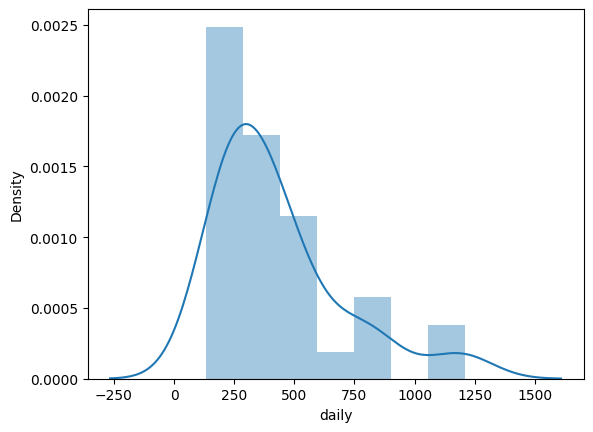

In [7]:
import seaborn as sns
sns.distplot(data['daily'])

C:\Users\drxmu\AppData\Local\Temp\ipykernel_15708\3800732917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

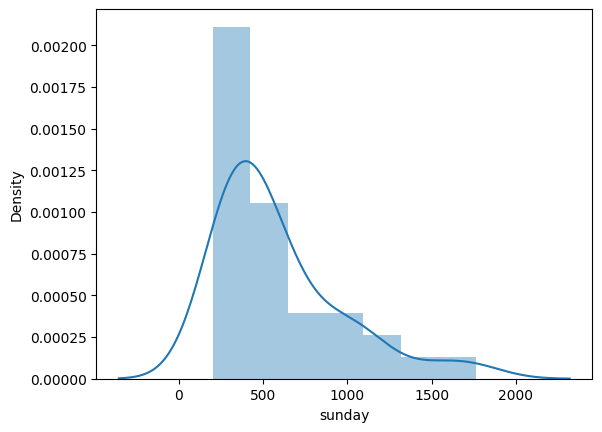

In [8]:
import seaborn as sns
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = df).fit()

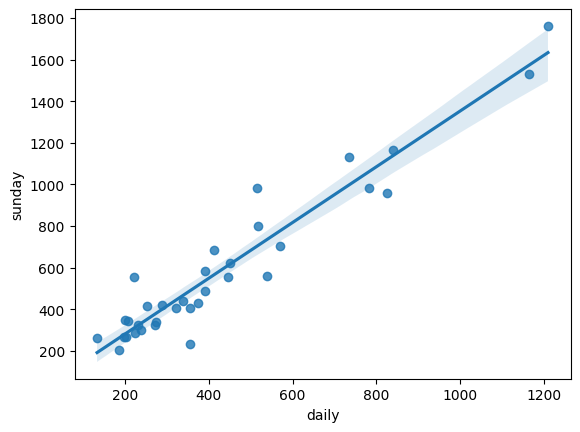

In [10]:
sns.regplot(x="daily", y="sunday", data=df);

In [11]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.9180596895873295), np.float64(0.9154990548869336))

# Predict for new data point

In [14]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,1000])

In [15]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [16]:
data_pred

,daily
0,200
1,300
2,1000


In [17]:
model.predict(data_pred)

0     281.778581
1     415.750057
2    1353.550388
dtype: float64